# Cryptocurrency vs Gold
Is there a correlation between cryptocurrencies and gold? Which one is more riskier? Which will prove to be a better investment?

##### Jupyter Notebook for Data Analysis, Data Cleaning, Data Presentation 

In [49]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import seaborn as sns
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
import hvplot.pandas
pn.extension("plotly")

#Use one new Python library that hasn't been covered in class. (Yfinance is yahoo finance)
import yfinance as yf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Cryptocurrencies and Gold

Choosing the elements for our analysis

The rapid rise of cryptocurrencies over the past few years has drawn the attention of investors and analysts alike, and most often investments in cryptocurrencies are compared to investments in gold. Although there might be some similiarities, it is widely acknowledged that gold and cryptocurrencies have no corrrelation.

[BTC] - Bitcoin is the world’s first decentralized cryptocurrency and shares some similarities to gold. Indeed, many people have referred to bitcoin as “digital gold” in the past due to its poor relationship with all other assets, particularly stocks. Bitcoin, like gold, has a finite supply.

[ETH] - Ethereum is a decentralised, open-source blockchain that supports smart contracts. Ether is the platform's native cryptocurrency. In terms of market capitalization, Ether is second only to Bitcoin among cryptocurrencies.

[LTC] - Litecoin is a cryptocurrency founded in late 2011 by Charlie Lee, a former Google and Coinbase engineer. Lee copied the Bitcoin codebase, increased the total supply, and changed the rate at which new blocks are added to the blockchain to create Litecoin. Only 84 million litecoins will ever be created, which is quadruple the total bitcoin supply.

[Gold] - Gold is the largest market among the five major precious metals that are openly traded on various exchanges. Gold is sometimes referred to as monetary metals because it has historically been used as a currency and as a store of value. Gold, despite its small size, has an industrial component because it is less reactive, a good conductor, highly malleable, and does not corrode.

The most prominent difference between the two is that cryptocurrency does not exist in physical form, and there is no need for banking intermediaries to facilitate the transaction.

- Pointers in favour of gold?
1. Gold is a valuable material for consumer goods such as jewelry.
2. Regardless of the demand, supply of gold is disproportionately low.
3. Gold cannot be created. A corporation can issue new shares, and the federal government can print dollar bills, but there is no such thing as gold. It has to be extracted from the ground and processed.

- Pointers in favour of cryptocurrency?
1. Bitcoin is a blockchain-based cryptocurrency with some similarities to gold. Indeed, many people have referred to bitcoin as “digital gold” in the past due to its poor relationship with all other assets, particularly stocks.
2. Like gold, Bitcoin has a finite supply.

- Comparison between gold and cryptocurrency
1. Gold ranks higher than cryptocurrency in terms of legality, transparency, and safety.
2. Both are rare.
3. In terms of volatility, Bitcoin and other cryptocurrencies are far more volatile than gold.
4. Gold is unrivalled in its accessibility to people of all economic backgrounds and technological knowledge.
5. Gold is the ultimate currency of central banks.

Read more at:
https://economictimes.indiatimes.com/markets/cryptocurrency/gold-vs-bitcoin-which-one-is-a-better-option-for-investment/articleshow/85148997.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

In [3]:
# Set tickers for the cryptocurrency we are using in our analysis, that is, Bitcoin, Ethereum, and Lite Coin
BTC = yf.Ticker("BTC-USD")
ETH = yf.Ticker("ETH-USD")
LTC = yf.Ticker("LTC-USD")
Gold = yf.Ticker("GC=F")

In [4]:
# Pull the data for all our variables. We'll pull the combined data from Pre-Covid era (1 Mar 2018) to most recently (1 June 2021) and slice it for our pre-covid and post covid analysis 
btc_data = BTC.history(start="2018-03-01", end="2021-06-01", actions=False)
eth_data = ETH.history(start="2018-03-01", end="2021-06-01")
ltc_data = LTC.history(start="2018-03-01", end="2021-06-01")
gold_data = Gold.history(start="2018-03-01", end="2021-06-01")

We'll clean the data performing the following steps:

1. Drop unwanted columns
2. Rename column name to ticker
3. Check for data types using the dtypes function 
4. Check for and Null values if any

In [5]:
# Dropping unrequired columns
btc_data = btc_data.drop(columns=['Open', 'High', 'Low', 'Volume']).rename(columns={"Close": "BTC"})
eth_data = eth_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']).rename(columns={"Close": "ETH"})
ltc_data = ltc_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']).rename(columns={"Close": "LTC"})
gold_data = gold_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']).rename(columns={"Close": "Gold"})

In [6]:
# Join the data into one dataframe
combined_df = pd.concat([btc_data, eth_data, ltc_data, gold_data], axis="columns", join="inner")
combined_df

,BTC,ETH,LTC,Gold
Date,,,,
2018-03-01,10951.000000,872.200012,209.750000,1302.900024
2018-03-02,11086.400391,856.853027,212.556000,1321.099976
2018-03-05,11573.299805,853.684021,211.175003,1318.099976
2018-03-06,10779.900391,816.950989,196.600998,1333.599976
2018-03-07,9965.570312,752.830994,185.839005,1326.000000
...,...,...,...,...
2021-05-25,38402.222656,2706.628906,183.497894,1898.099976
2021-05-26,39294.199219,2888.698730,199.224335,1901.300049
2021-05-27,38436.968750,2736.488525,193.121094,1895.699951


In [7]:
# Check the data types
combined_df.dtypes

BTC     float64
ETH     float64
LTC     float64
Gold    float64
dtype: object

In [8]:
# Check for and drop any null values
combined_df.isnull().sum()

BTC     0
ETH     0
LTC     0
Gold    0
dtype: int64

## PreCovid Analysis

We will segregate the data to perform quantitative and risk analysis on the on the data before the pandemic hit. We have determined this duration to be from 1 Mar 2018 to 1 Mar 2020

##### The quantitative analysis will be based on the following functions for all portfolios:
1. Daily returns
2. Cumulative returns

##### The risk analysis will be based on following functions for each portfolio. We will also include a voloatituly comparison of each cryptcurrency against the mineral, gold.
1. Calculate the standard deviation for all portfolios.
2. Determine which portfolios are riskier than the Gold.

In [9]:
# Slice/segregate the data for the precovid era
precovid_data = combined_df['20180301':'20200301']
precovid_data.tail()

,BTC,ETH,LTC,Gold
Date,,,,
2020-02-24,9650.174805,265.216431,75.535622,1672.400024
2020-02-25,9341.705078,247.817596,71.180244,1646.900024
2020-02-26,8820.522461,225.680267,61.014309,1640.000000
2020-02-27,8784.494141,226.753387,61.507885,1640.000000
2020-02-28,8672.455078,226.760498,59.763958,1564.099976


##### Quantitative Analysis

In [10]:
# Calculation for daily returns:
daily_returns = precovid_data.pct_change().dropna().copy()
daily_returns.head()

,BTC,ETH,LTC,Gold
Date,,,,
2018-03-02,0.012364,-0.017596,0.013378,0.013969
2018-03-05,0.043919,-0.003698,-0.006497,-0.002271
2018-03-06,-0.068554,-0.043029,-0.069014,0.011759
2018-03-07,-0.075542,-0.078487,-0.054740,-0.005699
2018-03-08,-0.057253,-0.064071,-0.050194,-0.004600


In [11]:
# Calculation for cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.head()

,BTC,ETH,LTC,Gold
Date,,,,
2018-03-02,0.012364,-0.017596,0.013378,0.013969
2018-03-05,0.056826,-0.021229,0.006794,0.011666
2018-03-06,-0.015624,-0.063344,-0.062689,0.023563
2018-03-07,-0.089985,-0.136860,-0.113998,0.017730
2018-03-08,-0.142087,-0.192162,-0.158470,0.013048


In [12]:
# Read in the data for the plot
cumulative_returns_plot = cumulative_returns.hvplot.area(title="Cumulative Returns - PreCovid", height=400, width=800, stacked=False)

Column
    [0] HoloViews(NdOverlay)
    [1] Str(AxesSubplot)

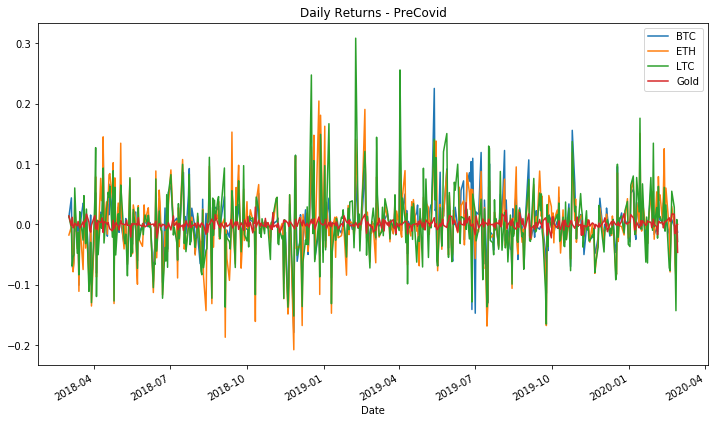

In [13]:
# Put both plots in a single column
first_column = pn.Column(cumulative_returns_plot, daily_returns.plot(title="Daily Returns - PreCovid", figsize=(12,7)))
first_column

Cumulative Returns - Cumulative returns provide the total change in the investment price over a set time, giving an an aggregate return, not an annualized one. The cumulative returns for Gold are mostly positive and stable compared to those of each of the cryptocurrencies in question. Clearly implying that the latter is the riskier choice.

Daily Returns - A stock with lower positive and negative daily returns is less risky than one with higher daily returns, which causes larger swings in value. As we can note above, daily returns from Gold are stable over the period, making it the least riskier compared to the cryptocurrencies which clearly does not seem to follow any sort of pattern.  

##### Risk Analysis

In [14]:
# Calculate the daily standard deviations of all portfolios
volatility = daily_returns.std()
volatility

BTC     0.042096
ETH     0.055111
LTC     0.056615
Gold    0.007327
dtype: float64

In [15]:
# Calculate the daily standard deviation of Gold
volatility_gold = daily_returns['Gold'].std()

# Determine which cryptocurrencies are riskier than Gold
daily_returns.std()>volatility_gold

BTC      True
ETH      True
LTC      True
Gold    False
dtype: bool

In [16]:
# Calculate and plotting the correlation
correlation = daily_returns.corr()

correlation_precovid = correlation.hvplot(title="Correlation - PreCovid")
correlation_precovid

:NdOverlay   [Variable]
   :Curve   [index]   (value)

Our results determine that Gold is the least volatile when compared to the cryptocurrencies, and our findings suggest that Gold and Bitcoin have little to no correlation, this is also backed by the article available on https://www.gold.org/goldhub/research/gold-and-cryptocurrencies, quoting "The correlation between gold and bitcoin is low. And, while it was generally positive in 2020, it was far from consistent in one direction. This indicates that gold and Bitcoin are not behaving similarly. Furthermore, if Bitcoin were a gold substitute, it would react similarly to gold to the performance of other assets, particularly equities."

## Post-Covid Analysis

We will segregate the data to perform quantitative and risk analysis on the on the data when the pandemic hit. We have determined this duration to be from 1 Mar 2020 to 1 Jun 2021

##### The quantitative analysis will be based on the following functions for all portfolios:
1. Daily returns
2. Cumulative returns

##### The risk analysis will be based on following functions for each portfolio. We will also include a voloatituly comparison of each cryptcurrency against the mineral, gold.
1. Calculate the standard deviation for all portfolios.
2. Determine which portfolios are riskier than the Gold.

In [17]:
# Slice/segregate the data for the post covid era
postcovid_data = combined_df['20200301':'20210601']
postcovid_data.head()

,BTC,ETH,LTC,Gold
Date,,,,
2020-03-02,8869.669922,230.569778,60.995548,1592.300049
2020-03-03,8787.786133,224.479630,61.144478,1642.099976
2020-03-04,8755.246094,224.517975,60.382420,1641.099976
2020-03-05,9078.762695,229.268188,62.045460,1666.400024
2020-03-06,9122.545898,243.525299,63.025600,1670.800049


##### Quantitative Analysis

In [18]:
# Calculation for daily returns:
daily_returns_post_covid = postcovid_data.pct_change().dropna().copy()
daily_returns_post_covid.head()

,BTC,ETH,LTC,Gold
Date,,,,
2020-03-03,-0.009232,-0.026413,0.002442,0.031275
2020-03-04,-0.003703,0.000171,-0.012463,-0.000609
2020-03-05,0.036951,0.021157,0.027542,0.015417
2020-03-06,0.004823,0.062185,0.015797,0.002640
2020-03-09,-0.131422,-0.170574,-0.204004,0.002214


In [19]:
# Calculation for cumulative returns
cumulative_returns_post_covid = (1 + daily_returns_post_covid).cumprod() - 1
cumulative_returns_post_covid.head()

,BTC,ETH,LTC,Gold
Date,,,,
2020-03-03,-0.009232,-0.026413,0.002442,0.031275
2020-03-04,-0.012901,-0.026247,-0.010052,0.030647
2020-03-05,0.023574,-0.005645,0.017213,0.046536
2020-03-06,0.028510,0.056189,0.033282,0.049300
2020-03-09,-0.106658,-0.123969,-0.177511,0.051623


In [20]:
# Read in the data for the plot
cumulative_returns_plot_post_covid = cumulative_returns_post_covid.hvplot.area(title="Cumulative Returns - Post Covid", height=400, width=800, stacked=False)

Column
    [0] HoloViews(NdOverlay)
    [1] Str(AxesSubplot)

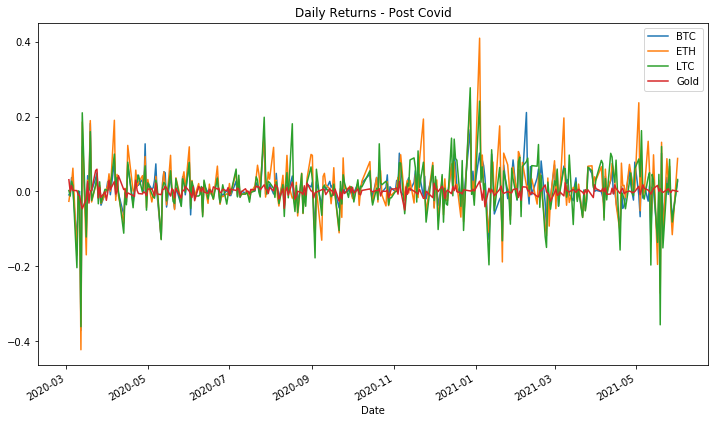

In [21]:
# Put both plots in a single column
second_column = pn.Column(cumulative_returns_plot_post_covid, daily_returns_post_covid.plot(title="Daily Returns - Post Covid", figsize=(12,7)))
second_column

In [22]:
## Please run code to see plot for cumulative returns

As per our post Covid analysis, the parameters have changed drastically during Covid with each of the cryptocurrencies outperforming Gold in terms of positive cumulative returns and amongst the three cryptocurrencies, Ethereum outperforming both LTC and BTC, especially BTC which has always been the leading cryptocurrency in the market. Gold still remains consistent, and more stable compared to the cryptocurrencies, also visible with the Daily Returns graph, where we can notice that the peaks for the cryptocurrencies are less static than in the precovid era. 

Snippets from a research articles that support the jump in Ethereum overall:
1. "Ethereum has surpassed its three-year high, which has benefited projects whose own tokens are issued on its network. Decentralized finance (DeFi), an Ethereum-centered movement aimed at re-creating banking and lending services in a crypto environment, has reaped the most benefits from Ethereum's rally. The market cap of DeFi tokens has now surpassed 66 billion usd, while the total value of assets locked into decentralised finance protocols has more than doubled to 34 billion usd since the beginning of the year."
https://www.forbes.com/sites/lawrencewintermeyer/2021/02/09/bitcoin-beats-gold-but-doge-beats-everything-as-crypto-takes-over/?sh=1788ea397a8f

2. "According to a survey conducted at University of Chicago, more than one out of every ten Americans invested in cryptocurrency in the previous year, demonstrating the growing popularity of digital currencies like bitcoin and ethereum. According to the survey, 13 percent of Americans purchased or traded cryptocurrency in the previous 12 months, while 24 percent of Americans invested in stocks during the same time period. The rise in cryptocurrency prices earlier this year most likely influenced investors."
https://www.cnbc.com/2021/07/23/13percent-of-americans-traded-crypto-in-the-past-year-survey-finds.html

##### Risk Analysis

In [23]:
# Calculate the daily standard deviations of all portfolios
volatility = daily_returns_post_covid.std()
volatility

BTC     0.051108
ETH     0.072157
LTC     0.069256
Gold    0.012863
dtype: float64

In [24]:
# Calculate the daily standard deviation of Gold
volatility_gold_covid = daily_returns_post_covid['Gold'].std()

# Determine which portfolios are riskier than Gold
daily_returns_post_covid.std()>volatility_gold_covid

BTC      True
ETH      True
LTC      True
Gold    False
dtype: bool

In [25]:
# Calculate and plotting the correlation and compare it with the correlation pre-covid
correlation_post_covid = daily_returns_post_covid.corr()
correlation_postcovid = correlation_post_covid.hvplot(title="Correlation - Post Covid")

In [26]:
correlation_comparison = pn.Row(correlation_precovid, correlation_postcovid)
correlation_comparison

Row
    [0] HoloViews(NdOverlay)
    [1] HoloViews(NdOverlay)

There is no visible difference between the correlation before and after Covid of the cryptocurrencies and gold, the graphs still imply that gold is the more stable amongst the four elements we are comparing.

Taking note from the famous Gold vs Crypto battle between Peter Schiff and Anthony Scaramucci:

""During the debate, Schiff stated that “in reality, Bitcoin and gold have absolutely nothing in common,” because gold has value due to its metallic properties, whereas Bitcoin is simply a “giant pump and dump.” He firmly stated that there is a distinction between “price and value,” with gold's value determined by real-world use cases, whereas BTC lacks tangible backing in the real world: “In 100 years, in 1,000 years, the gold that I am storing today will be melted down and used in electronics, jewellery, or whatever new uses that have been invented that do not even exist today.” Scaramucci reiterated that the value of Bitcoin is linked to its global network and that digitization is the next stage of humanity because “software is eating the world.” Schiff stated that he would only change his mind if BTC was backed by gold and used as a currency rather than being traded primarily.""

https://cointelegraph.com/news/peter-schiff-wins-debate-over-whether-gold-is-a-better-store-of-value-than-btc

### Precovid vs Post Covid Comparison

In [27]:
# We will calculate and plot the cumulative returns for the entire dataframe pre and post covid era to see the variation in cumulative returns over the entire period 
daily_returns_overall = combined_df.pct_change().dropna().copy()

In [28]:
cumulative_returns_overall = (1 + daily_returns_overall).cumprod() - 1
cumulative_returns_overall.hvplot.area(title="Cumulative Returns - Overall", height=500, width=1000, stacked=False)

:NdOverlay   [Variable]
   :Area   [Date]   (value)

When reviewing the cumulative returns over the entire period (before Covid to Post Covid era), we can see that the behaviour of the cryptocurrencies significantly changes in the latter half of 2020, when the pandemic continued to settle globally, and how the cumulative returns of the cryptocurrencies significantly surpassed that of gold.

Also looking at the larger picture and a more varied time duration, we can see that BTC remains the higher performer amongst the cryptocurrencies, while the jump in ETH was specifically significant starting January 2021. LTC too start to generate positive returns and slightly surpass gold, but this not till the latter half of 2021.

Excerpts from an article:
    "Bitcoin has experienced a steady rise to new all-time highs, breaking through 20,000 USD per BTC, as of December 2020, but the climb has not been a steady one. Taking a look at 2018 to get a sense of how troubled the market had been: Bitcoin was trading near 13,500 USD at the start of 2018, after reaching an all-time high of 19,783.06 USD in December, 2017. It subsequently fell to as low as 3,400 USD, representing a loss of roughly three-quarters of its value—and other digital currencies weren't faring much better at the time. For example, Ethereum (ETH) fell from an early-year high of 1,300 USD to just 91 USD by December 2018, before rallying back to over 450 USD by the end of 2020. Cryptocurrencies such as Bitcoin and Ethereum have proven to be extremely resilient, causing retail and institutional investor interest in digital currencies to rise dramatically in recent months. And indicating that there are still reasons to believe that the cryptocurrency industry has some fight left in it."
https://www.investopedia.com/where-are-cryptocurrencies-headed-2019-4580342 

#### What impact has Covid has on the market? What's the affect on cryptocurrencies and gold prices? Is there any correlation between Covid cases compared to gold and the cryptocurrencies?

For this section, we have obtained global COVID data from WHO, to see how COVID might have or have not had an affect on the proces of Gold and/or the cryptocurrencies, and also to determine the peak of COVID to utilize for our investment analsyis later in the project.

In [29]:
# Read in data from resource - covid cases from WHO
csv_path = Path("../Resources/WHO-COVID-19-global-data.csv")
df_covid_cases = pd.read_csv(csv_path)
df_covid_cases.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
151201,2021-09-27,ZW,Zimbabwe,AFRO,120,129625,1,4604
151202,2021-09-28,ZW,Zimbabwe,AFRO,0,129625,0,4604
151203,2021-09-29,ZW,Zimbabwe,AFRO,647,130272,11,4615
151204,2021-09-30,ZW,Zimbabwe,AFRO,213,130485,1,4616
151205,2021-10-01,ZW,Zimbabwe,AFRO,335,130820,7,4623


In [30]:
# Check for null values df_covid_cases
df_covid_cases.isnull().sum()

Date_reported          0
Country_code         638
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [31]:
# Cleaning dataframe by dropping nulls
df_covid_cases = df_covid_cases.dropna().copy()
df_covid_cases.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [32]:
# Cleaning dataframe by dropping extra unwanted columns
df_covid_cases_clean = df_covid_cases.drop(columns=['Country_code', 'Country', 'WHO_region', 'New_cases', 'New_deaths', 'Cumulative_deaths']).set_index('Date_reported')
df_covid_cases_clean.head()

,Cumulative_cases
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


In [33]:
# Call data specific to our analysis (covid peak to June 2021)
df_covid_cases_clean = df_covid_cases_clean[(df_covid_cases_clean.index > '2020-02-29') & (df_covid_cases_clean.index <= '2021-06-01')]
df_covid_cases_clean.head()

,Cumulative_cases
Date_reported,
2020-03-01,5
2020-03-02,5
2020-03-03,5
2020-03-04,5
2020-03-05,5


In [34]:
# Change date column name 
df_covid_cases_clean.index.names = ['Date']
df_covid_cases_clean.head()

,Cumulative_cases
Date,
2020-03-01,5
2020-03-02,5
2020-03-03,5
2020-03-04,5
2020-03-05,5


In [35]:
# Sum daily cumulative cases using Groupby
df_covid_cumulative_cases = df_covid_cases_clean.groupby([df_covid_cases_clean.index]).sum()
df_covid_cumulative_cases.head()

,Cumulative_cases
Date,
2020-03-01,87223
2020-03-02,88914
2020-03-03,91233
2020-03-04,94192
2020-03-05,96599


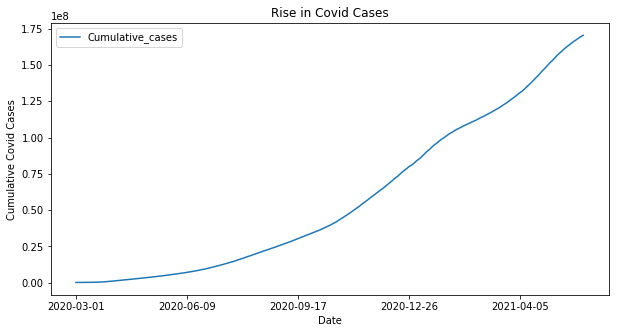

In [36]:
# Plot cumulative cases and crypto and gold prices over the period
cumulative_cases_plot = df_covid_cumulative_cases.plot(title="Rise in Covid Cases", xlabel='Date', ylabel='Cumulative Covid Cases', figsize=(10,5))
formatter = DatetimeTickFormatter(months='%b')

In [37]:
postcovid_plot = postcovid_data.hvplot(title="Cryptocurrency and Gold Prices", xlabel='Date', ylabel='Prices', height=400, width=900)
postcovid_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

There is no direct way to determine a correlation between the rise in Covid cases and Crypto and gold prices, however visualizations may suggest a slight correlation between Covid cases and specifically the price of BTC. While the prices of the other variables, gold, LTC, and ETH remains stagnant, BTC prices, although disorderly have surpassed the other three. 

Snippets from research articles

1. "Bitcoin trades like a tactical asset with a high octane rating. Market participants have noticed ‘safe haven-like' behaviour in Bitcoin at times, as it appears to move in a direction similar to some traditional hedges, such as gold. However, there is no discernible pattern. For example, in March 2020, Bitcoin fell more than 40% from peak to trough, finishing the month down 25% and behaving more like US technology stocks than gold. In contrast, while gold fell by 8% from peak to trough in March, it quickly recovered to end the month back at where it began, and then continued to rise as investors added hedges."

https://www.spglobal.com/platts/en/market-insights/blogs/metals/041421-gold-bitcoin-investment-dollar-currency-hedge-volatility

2. "Despite rising inflation, gold has been left in the dust by Bitcoin's meteoric rise over the last year, struggling to maintain its all-time high of USD 2,063 since August 2020. Although gold has dropped 30% from its peak of around USD 1,700 in March 2021, the precious metal is slowly regaining support and is now trading above USD 1,900 per troy ounce as a result of resurfaced inflation fears caused by a weaker dollar and a decline in US Treasury yields. 

    Before determining whether gold is poised for a bullish run or a sharp correction, it is critical to understand the fundamentals that influenced gold and Bitcoin in 2020 and early 2021. Economic and geopolitical factors such as the US-China trade war, Brexit uncertainty, and the threat of a global pandemic drove gold to an all-time high in 2020. However, the value of gold quickly fell as the US dollar, a safe-haven currency and global reserve, gained strength, diverting investors' attention away from gold as they sought to profit from the rising US dollar. Furthermore, gold's decline has been exacerbated by a sell-off in the US bond market, which has driven bond prices lower while yields have risen. Given that gold does not provide a real rate of return, investors have naturally shifted their focus to lower-cost, higher-yielding bonds. 

    During the global pandemic, while gold suffered, other assets such as Bitcoin skyrocketed as a result of increased institutional adoption, with MicroStrategy, Square, and, eventually, Tesla making significant Bitcoin purchases. Many investors shifted their focus to the cryptocurrency sector as a result of Bitcoin's rapid rise, leaving gold on the sidelines. Although Bitcoin has recently reached new all-time highs, its volatility has put it in the spotlight. BTC prices peaked around USD 64,800 in April before plummeting by more than 50% to around USD 30,000 just a month later on May 17, following Elon Musk's tweet about Tesla ceasing to accept Bitcoin as payment due to environmental concerns and other negative news. Gold, on the other hand, is quietly gaining traction and has reached a three-month high as a result of rising inflation fears and falling US yields. Consumers expect a 4.6 percent increase in inflation over the next year, the highest reading in a decade, as more consumers expect inflation to outpace income growth."

https://www.fintechnews.org/gold-vs-bitcoin-which-one-is-better-as-a-safe-haven-asset/

In [38]:
# Code for peak date - this will determine the peak of Covid based on the highest number of cases reportedly globally in one day
sorted = df_covid_cases.sort_values(by=['New_cases'], ascending=False)
max_date = df_covid_cases.nlargest(1, 'New_cases')
max_date

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
61738,2021-05-07,IN,India,SEARO,414188,21491598,3915,234083


#### Investment 

Inorder to further determine which element between gold and cryptocurrency would have been a better investment, in terms of volatility and returns, we will try to calculate it via a default asset volume assigned to each each element. And we will calculate the value of our investment in three different scenarios, 1. Start or Covid, 2. Peak of Covid, and 3. Precovid era (last date of our analysis) 

In [39]:
# Set asset volume:
btc_asset = 0.5
eth_asset = 5
ltc_asset = 35
gold_asset = 5

In [40]:
# Scenario 1 - Start of Covid

# Print closing prices on 2020-03-01:
btc_close_price_1 = combined_df.loc["20200302"]["BTC"]
eth_close_price_1 = combined_df.loc["20200302"]["ETH"]
ltc_close_price_1 = combined_df.loc["20200302"]["LTC"]
gold_close_price_1 = combined_df.loc["20200302"]["Gold"]

print(f"BTC closing price: ${btc_close_price_1:.02f}")
print(f"ETH closing price: ${eth_close_price_1:0.2f}")
print(f"LTC closing price: ${ltc_close_price_1:0.2f}")
print(f"Gold closing price: ${gold_close_price_1:0.2f}")

BTC closing price: $8869.67
ETH closing price: $230.57
LTC closing price: $61.00
Gold closing price: $1592.30


In [41]:
# Compute current value of my assets
btc_value_1 = (btc_asset) * (btc_close_price_1)
eth_value_1 = (eth_asset) * (eth_close_price_1)
ltc_value_1 = (ltc_asset) * (ltc_close_price_1)
gold_value_1 = (gold_asset) * (gold_close_price_1)

# Print current crypto wallet balance
print(f"The value of {btc_asset} BTC is ${btc_value_1:0.2f}")
print(f"The value of {eth_asset} ETH is ${eth_value_1:0.2f}")
print(f"The value of {ltc_asset} LTC is ${ltc_value_1:0.2f}")
print(f"The value of {gold_asset} Gold is ${gold_value_1:0.2f}")

The value of 0.5 BTC is $4434.83
The value of 5 ETH is $1152.85
The value of 35 LTC is $2134.84
The value of 5 Gold is $7961.50


In [42]:
# Scenario 2 - Peak of Covid

# Print closing prices on 2021-05-07:
btc_close_price_2 = combined_df.loc["20210507"]["BTC"]
eth_close_price_2 = combined_df.loc["20210507"]["ETH"]
ltc_close_price_2 = combined_df.loc["20210507"]["LTC"]
gold_close_price_2 = combined_df.loc["20210507"]["Gold"]

print(f"BTC closing price: ${btc_close_price_2:.02f}")
print(f"ETH closing price: ${eth_close_price_2:0.2f}")
print(f"LTC closing price: ${ltc_close_price_2:0.2f}")
print(f"Gold closing price: ${gold_close_price_2:0.2f}")

BTC closing price: $57356.40
ETH closing price: $3484.73
LTC closing price: $346.25
Gold closing price: $1831.10


In [43]:
# Compute current value of my assets
btc_value_2 = (btc_asset) * (btc_close_price_2)
eth_value_2 = (eth_asset) * (eth_close_price_2)
ltc_value_2 = (ltc_asset) * (ltc_close_price_2)
gold_value_2 = (gold_asset) * (gold_close_price_2)

# Print current crypto wallet balance
print(f"The value of {btc_asset} BTC is ${btc_value_2:0.2f}")
print(f"The value of {eth_asset} ETH is ${eth_value_2:0.2f}")
print(f"The value of {ltc_asset} LTC is ${ltc_value_2:0.2f}")
print(f"The value of {gold_asset} Gold is ${gold_value_2:0.2f}")

The value of 0.5 BTC is $28678.20
The value of 5 ETH is $17423.65
The value of 35 LTC is $12118.87
The value of 5 Gold is $9155.50


In [44]:
# Scenario 3 = PreCovid era 

# Print closing prices on 2021-06-01:
btc_close_price_3 = combined_df.loc["20210601"]["BTC"]
eth_close_price_3 = combined_df.loc["20210601"]["ETH"]
ltc_close_price_3 = combined_df.loc["20210601"]["LTC"]
gold_close_price_3 = combined_df.loc["20210601"]["Gold"]

print(f"BTC closing price: ${btc_close_price_3:.02f}")
print(f"ETH closing price: ${eth_close_price_3:0.2f}")
print(f"LTC closing price: ${ltc_close_price_3:0.2f}")
print(f"Gold closing price: ${gold_close_price_3:0.2f}")

BTC closing price: $36684.93
ETH closing price: $2633.52
LTC closing price: $182.98
Gold closing price: $1902.90


In [45]:
# Compute current value of my assets
btc_value_3 = (btc_asset) * (btc_close_price_3)
eth_value_3 = (eth_asset) * (eth_close_price_3)
ltc_value_3 = (ltc_asset) * (ltc_close_price_3)
gold_value_3 = (gold_asset) * (gold_close_price_3)

# Print current crypto wallet balance
print(f"The value of {btc_asset} BTC is ${btc_value_3:0.2f}")
print(f"The value of {eth_asset} ETH is ${eth_value_3:0.2f}")
print(f"The value of {ltc_asset} LTC is ${ltc_value_3:0.2f}")
print(f"The value of {gold_asset} Gold is ${gold_value_3:0.2f}")

The value of 0.5 BTC is $18342.46
The value of 5 ETH is $13167.59
The value of 35 LTC is $6404.32
The value of 5 Gold is $9514.50


In [46]:
# Concat the investment data into one:
df = {'Date': ["2020-03-01", "2021-05-07","2021-06-01"], 
      'BTC': [btc_value_1,btc_value_2,btc_value_3], 
      'ETH': [eth_value_1,eth_value_2,eth_value_3], 
      'LTC': [ltc_value_1,ltc_value_2,ltc_value_3],
      'Gold': [gold_value_1,gold_value_2,gold_value_3]}
investment_df = pd.DataFrame(data=df)
investment_df

,Date,BTC,ETH,LTC,Gold
0,2020-03-01,4434.834961,1152.848892,2134.844189,7961.500244
1,2021-05-07,28678.201172,17423.645020,12118.874969,9155.499878
2,2021-06-01,18342.462891,13167.591553,6404.324417,9514.500122


In [47]:
# Plot the results in a graph to observe movement
compare_results = investment_df.set_index('Date')
compare_results.hvplot.line(title="My investment during Covid: Crypto VS. Gold (2020-2021)", height=300, width=700)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

Right away, our example suggests that investment in gold would considered to be the 'safest', least 'volatile' and the most stable option in comparison with the the three crypto currencies. Though it should also be pointed out that gold also generates the least returns, and where gold loses, BTC gains as the maximum retruns are from investment in BTC, but again, this is also the most volatile and irregular of the three. Despite the generous returns from investment in BTC, investors may still tend to hold back due to the instability and uncertainity it poses. The other crypto currencies imitate a similar pattern to BTC, however it can be debated that their impact is not as significant, though still greater than that of gold (except LTC). However, there is no reason as to why a portfolio cannot not include both crypto currencies and gold, rather than deciding on either one or two? A varied investment portfolio can prove to be more profitable and and beneficial than a limited profile, as gains from one investment can help to overcome the loss from the weak performance of another.

Our conclusion is further backed by the following snippets taken from research articles:

1. "The pandemic as managed to ascertain that people have shifted towards safe-haven assets. Although gold has given good returns, crypto has given even better returns than gold and that is why, crypto can be considered as the new hot cake in terms of investment. In terms of final verdict, Bitcoin has outperformed gold as a store of value 100 times over. The rest of the world is catching on and starting to price digital currency in real time. Although Bitcoin has increased many times in the last few months, it is expected to continue increasing in US dollar terms in the coming years. Perhaps by 2030, the market capitalization of Bitcoin will exceed that of gold. Both gold and cryptocurrency have advantages and disadvantages. It is entirely up to the investor to decide where they want to invest." 
https://economictimes.indiatimes.com/markets/cryptocurrency/gold-vs-bitcoin-which-one-is-a-better-option-for-investment/articleshow/85148997.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

2. "Gold is distinct from cryptocurrencies in general, and particularly Bitcoin. Gold is a tried-and-true portfolio investment tool. It has provided returns comparable to the stock market over various time horizons; it has performed well during inflationary periods; it is a highly liquid, established market; and it has acted as an important portfolio diversifier, exhibiting negative correlation to the market during downturns. The recent performance of cryptocurrencies has been notable, but their purpose as an investment appears to be quite different from that of gold. The cryptocurrency market is still in its early stages, with limited liquidity. We believe that, while their current price behaviour is appealing to many investors, it appears to be driven in large part by high return expectations fueled by momentum and aided by low interest rates."
https://www.gold.org/goldhub/research/gold-and-cryptocurrencies

3. "According to a University of Chicago survey, more than one in ten Americans invested in cryptocurrency in the previous year, demonstrating the growing popularity of digital currencies such as bitcoin and ethereum. In particular, 13 percent purchased or traded cryptocurrency in the previous 12 months, while 24 percent of Americans invested in stocks during the same time period, according to the survey. Investors were most likely influenced by a rise in cryptocurrency prices earlier this year..... Because of this volatility, some financial experts have labelled cryptocurrency as a speculative asset. Financial advisors generally advise cryptocurrency investors to allocate only a small portion of their portfolio to it. “Potential investors are wary of putting their retirement savings into what has historically been a fairly volatile investment,” said Mark Lush, manager of NORC's Behavioral and Economic Analysis and Decision-Making team. “While cryptocurrency may have staying power as an investment option, our hunch is that it will continue to lag behind more traditional investment opportunities for the foreseeable future,” he said."
https://www.cnbc.com/2021/07/23/13percent-of-americans-traded-crypto-in-the-past-year-survey-finds.html

In [48]:
### Thank You! ###